In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer=pd.read_csv(r"Customer Churn.csv")
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# We noticed that Total charges columns should be in float rather then object. We need to convert it into float

In [5]:
customer["TotalCharges"]=customer["TotalCharges"].replace(" ","0")
customer["TotalCharges"]=customer["TotalCharges"].astype('float')

In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Checking null values

In [8]:
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Checking Duplicates

In [10]:
customer.duplicated().sum()

0

In [11]:
# Checking statistical parameters

In [12]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
# converted 0 and 1 value of senior citizen to yes/no to make t easier to understand

In [14]:
def conv(value):
    if value ==1:
        return'yes'
    else:
        return'no'
customer['seniorCitizen']=customer['SeniorCitizen'].apply(conv)

In [15]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,seniorCitizen
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,no
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,no
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,no
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,no
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,no


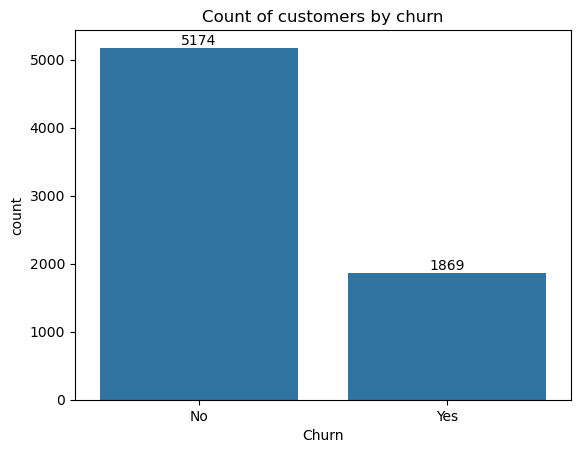

In [16]:
ax=sns.countplot(x='Churn',data=customer)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show()

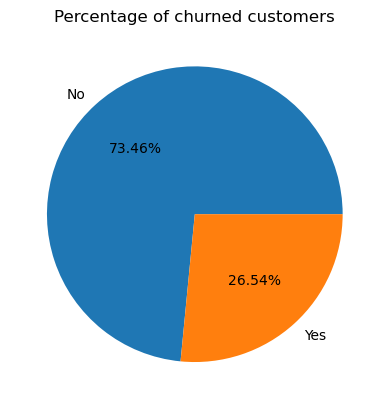

In [17]:
gb=customer.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of churned customers")
plt.show()

In [18]:
# From the given pie chart we can conclude that 26.54% of our customers have churnrd out.
# Now Explore the reason behind it

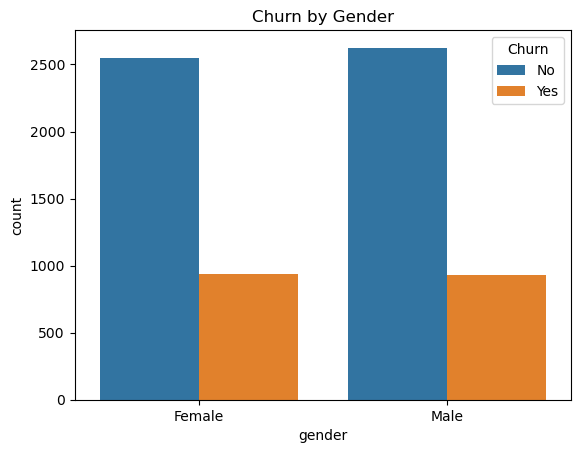

In [20]:
sns.countplot(x="gender",data=customer,hue='Churn')
plt.title("Churn by Gender")
plt.show()

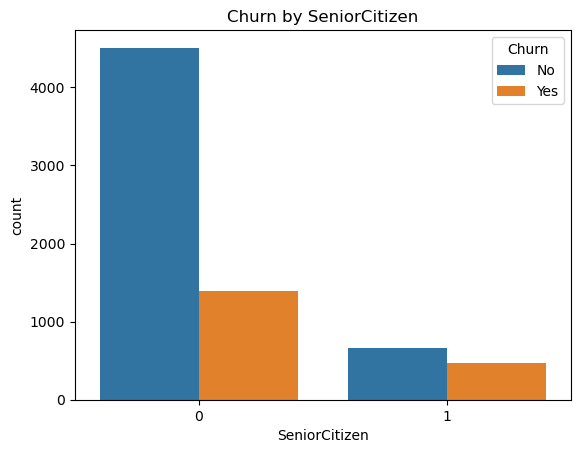

In [21]:
sns.countplot(x="SeniorCitizen",data=customer,hue='Churn')
plt.title("Churn by SeniorCitizen")
plt.show()

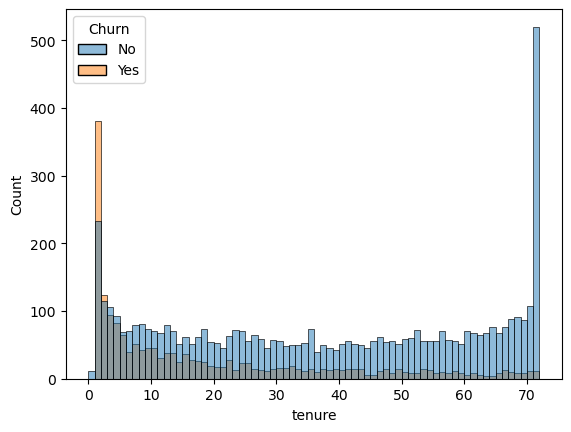

In [25]:
sns.histplot(x='tenure',data=customer,bins=72,hue='Churn')
plt.show()

In [26]:
# People who have used our services for a long time have stayed and people who have used our services foe 1 or 2 months have churned.

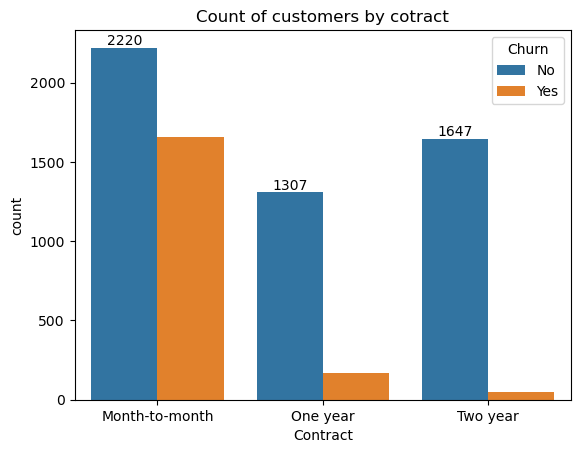

In [28]:
ax=sns.countplot(x='Contract',data=customer,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by cotract")
plt.show()

In [29]:
# People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [30]:
customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'seniorCitizen'],
      dtype='object')

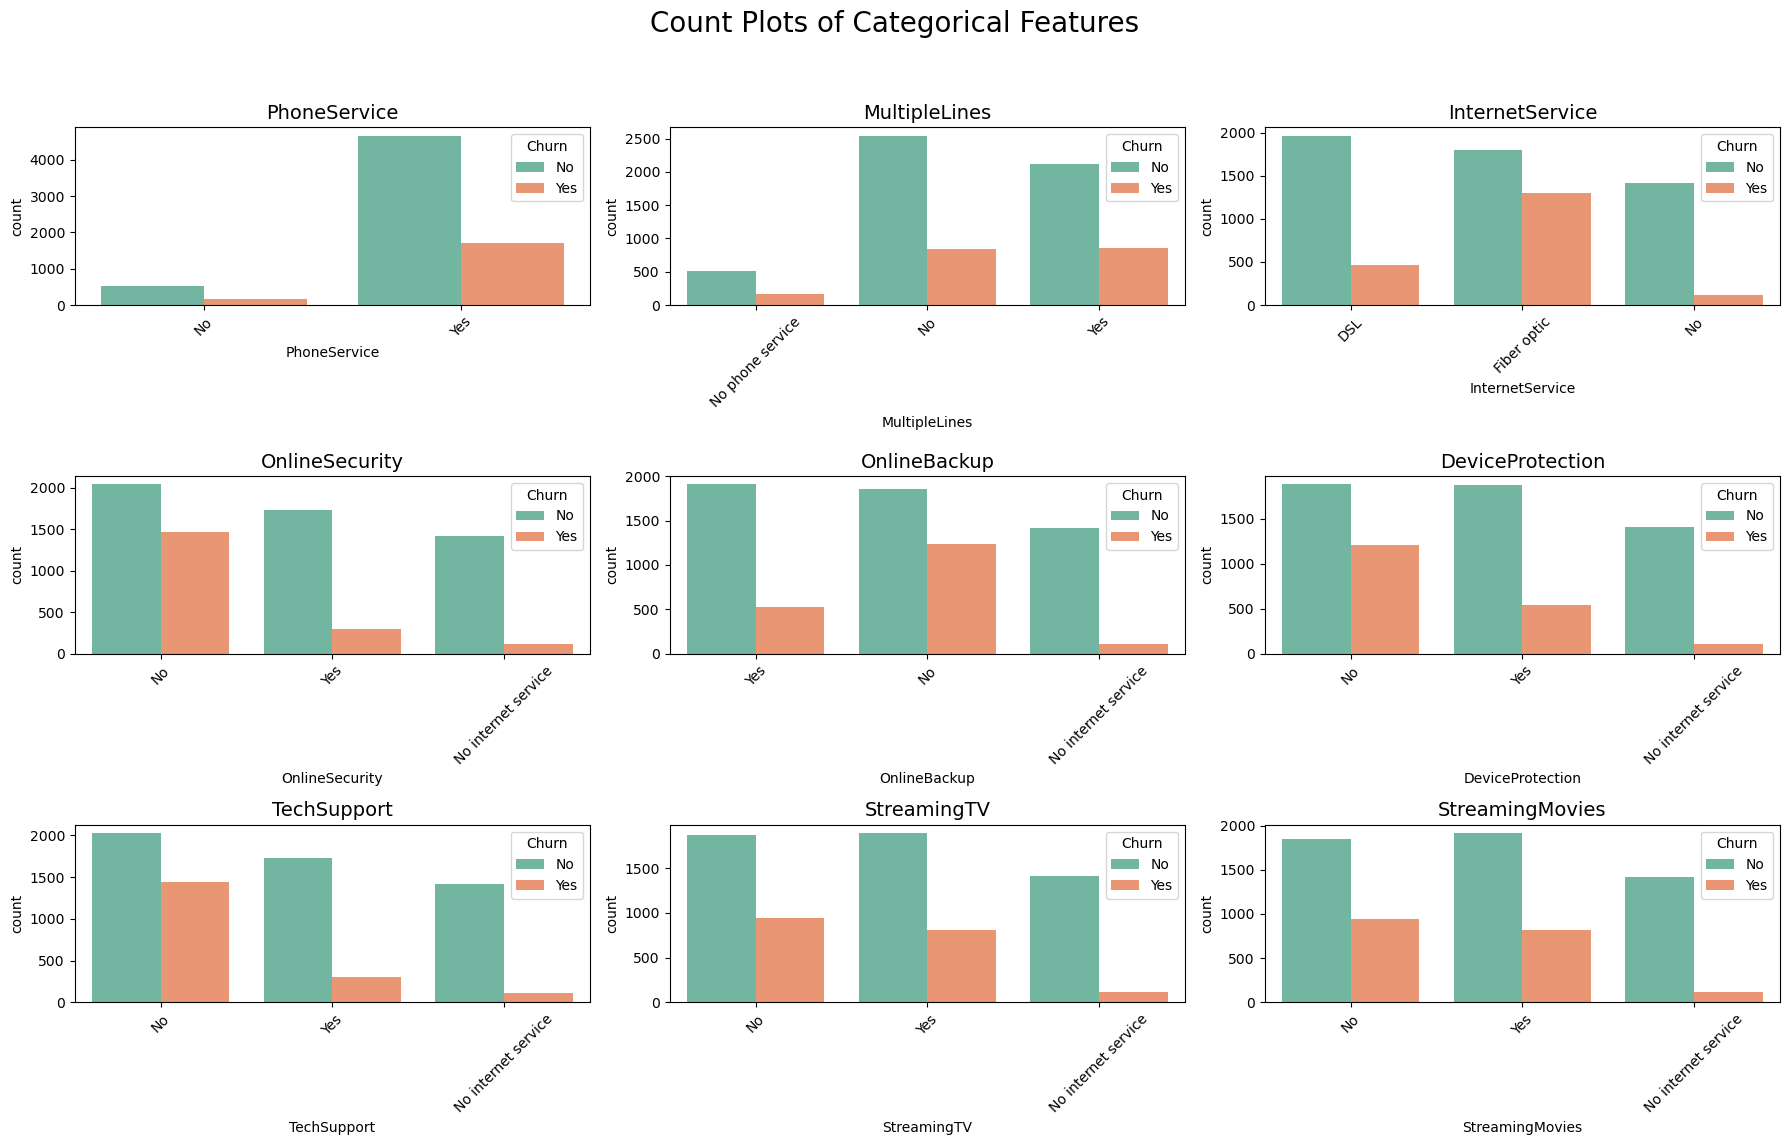

In [33]:
# Assuming your dataframe is named df
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid (3 rows x 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Count Plots of Categorical Features', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through columns and plot countplots
for i, col in enumerate(columns):
    sns.countplot(data=customer, x=col, ax=axes[i], palette='Set2',hue=customer["Churn"])
    axes[i].set_title(f'{col}', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [34]:
# The majority of customers who do not churn tend to have services like PhoneService (particularly DSL),and OnlineSecurity enabled.
# For services like OnlineBackup,TechSupport,and Streaming TV,churn rates are noticeably higher when these Service are not used or are Unavailable

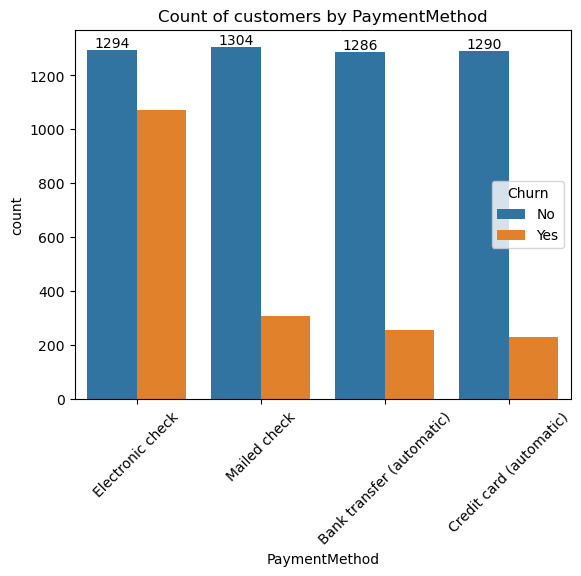

In [37]:
ax=sns.countplot(x='PaymentMethod',data=customer,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by PaymentMethod")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Customer is likely tochu